In [1]:
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import seaborn as sns
import numpy as np
import scipy.stats as stats

C:\Users\saifk\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Does distance from specific locations have an effect on price?


In [2]:
df = pd.read_csv('../Data/master_df.csv')

In [3]:
df.drop('date', axis = 1, inplace = True)

## Let's see what the distance from Seattle would be like!


In [4]:
seattle = (47.6062, -122.3321)


In [5]:
R = 6373 #approximate radius of earth in km


In [7]:
def location_distance(lat, long, location):
    
    R = 6373 #approximate radius of earth in km
    location_lat = radians(location[0])
    location_long = radians(location[1])
    house_lat = radians(lat)
    house_long = radians(long)
    
    dlat = house_lat - location_lat
    dlong = house_long - location_long
    
    a = sin(dlat / 2)**2 + cos(location_lat) * cos(house_lat) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

In [8]:
location_distance(47.5112, -122.257, seattle)

11.976445604063855

In [9]:
df['distance_from_seattle_km'] = df.apply(lambda x: location_distance(x['lat'], x['long'], seattle), axis=1)

## Our originial data didn't have many properties that were considered waterfront, but does being near the water have an effect on price?


In [10]:
hotspot_locations = [(47.6476, -122.2451), (47.5925, -122.0957), (47.6096, -122.3996), (47.4193, -122.3907)]

Hotspot locations were not chosen by any specific method other than eye-balling just to get an idea if this would be a good metric

In [11]:
def distance_from_nearest_hotspot(lat, long, hotspots):
    distances = []
    for x in hotspots:
        distances.append(location_distance(lat, long, x))
#         print(distances)
    return min(distances)

In [12]:
distance_from_nearest_hotspot(48.7212, -132.319, hotspot_locations)


745.6609405891073

In [13]:
df['distance_from_nearest_hotspot'] = df.apply(lambda x: 
                                            distance_from_nearest_hotspot(x['lat'], x['long'], hotspot_locations), axis=1)

In [14]:
df.drop(columns = ['lat', 'long', 'waterfront', 'sqft_living15', 'sqft_lot15', 'month', 'year', 'sqft_basement' ], axis = 1, inplace = True)

In [15]:
cols_to_filt = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above', 'age_when_sold', 'distance_from_seattle_km', 'distance_from_nearest_hotspot']

In [16]:
df = df[(np.abs(stats.zscore(df[cols_to_filt])) < 3).all(axis=1)]

## Lets see if theres a strong relationship with these new distance measurments!

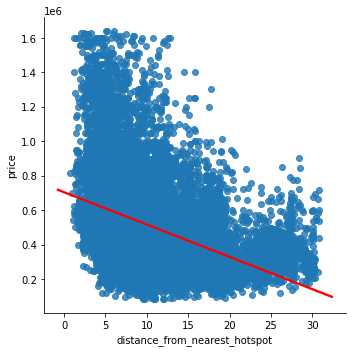

In [19]:

sns.lmplot(x='distance_from_nearest_hotspot', y='price', data=df, line_kws={'color': 'red'})

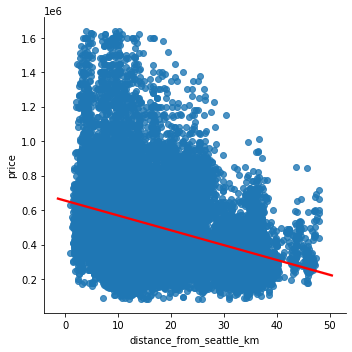

In [20]:
sns.lmplot(x='distance_from_seattle_km', y='price', data=df, line_kws={'color': 'red'})


It does appear that there's a relationship between price and these distances! The closer a property is to water the greater the potential price range it seems. The same can be said with distance from Seattle.